In [2]:
%run /home/user/besos/Matthias/tools/imports.ipynb
def preprocess(X, y, standardization=None):
    
    if standardization is None:
        standardization = [StandardScaler() for i in range(2)]
        X = standardization[0].fit_transform(X)
        y = standardization[1].fit_transform(y)
    else:
        X = standardization[0].transform(X)
        y = standardization[1].transform(y)

    return X, y, standardization

def get_model_4(n_params=14, n_neurons=256, alpha=0.0003):
    inputs = Input(shape=(n_params))
    hidden = Dense(n_neurons, activation=LeakyReLU(), kernel_regularizer=regularizers.l2(alpha))(inputs)
    outputs = Dense(1, activation=LeakyReLU(), kernel_regularizer=regularizers.l2(alpha))(hidden)
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(), loss='mse')
    model.summary()
    
    return model

ann = KerasRegressor(build_fn=get_model_4, epochs=800, verbose=0)

In [3]:
X, y = read_samples('CAN', param_set=23, limit=10000, output_meter = 'DistrictHeating:Facility')
X, y, _ = preprocess(pd.concat([X.iloc[:,:13], X.iloc[:,17]], axis=1), y)
title = f'Learning curve of "HHD only" model'

Model: "model_96"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_97 (InputLayer)        [(None, 14)]              0         
_________________________________________________________________
dense_192 (Dense)            (None, 256)               3840      
_________________________________________________________________
dense_193 (Dense)            (None, 1)                 257       
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________
Model: "model_97"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_98 (InputLayer)        [(None, 14)]              0         
_________________________________________________________________
dense_194 (Dense)            (None, 256)               3840      
______________________________________

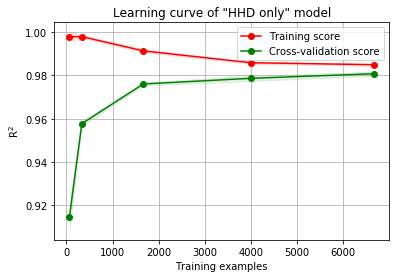

In [16]:
%%time
estimator = copy.deepcopy(ann)
fig = plot_learning_curve(estimator, X, y, title, n_jobs=1, scorer="R2", cv=3,  train_sizes=np.array([0.01, 0.05, 0.25, 0.6, 1.]))
fig.savefig('model4_learning_curve_R2', dpi=300)